In [18]:
%load_ext autoreload
%autoreload 2

import mc_cup
mc_cup.__dir__()


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


['__name__',
 '__loader__',
 '__spec__',
 '__package__',
 '__path__',
 '__file__',
 '__cached__',
 '__builtins__',
 'BamseScraper',
 'TournamentBracket',
 'Cup16',
 'Cup32',
 'CupResult',
 'DUMMY']

In [21]:
from conf_2024 import URL, LANES,RANK_W,RANK_M
from mc_cup import TournamentBracket,BamseScraper, Cup16, Cup32,CupResult, export32, export16

data = BamseScraper(URL)


Found 97 players.


In [24]:
cup = Cup16(RANK_W, data, LANES)
# Set Results here

# cup.set('G1',CupResult('Stefanie Blendermann', ' Mirva Juhola', (3,2)))

cup.run()
export16(cup, 'matchplay_2024_W.html')





Sarah Schumacher Silvia Bandera F4
Alva Kvarnström Jasmin Bothmann F6
Karin Olsson Mia Vuorihovi F8
Marielle Svensson Martina Maderová F10
Stefanie Blendermann Kristyna Palánová F12
Anna Bandera Martina Saletta F13
Julia Sjöberg Lucie Indráková F15
Vanessa Peuker Mirva Juhola F17
Sarah Schumacher Jasmin Bothmann F1
Karin Olsson Marielle Svensson F6
Stefanie Blendermann Anna Bandera F10
Julia Sjöberg Vanessa Peuker F13
Sarah Schumacher Karin Olsson E1
Anna Bandera Vanessa Peuker E1
Karin Olsson Anna Bandera E1
Sarah Schumacher Vanessa Peuker E1


In [ ]:
cup = Cup32(RANK_M, data, LANES)
# Set Results here
# cup.set('G1',CupResult('Stefanie Blendermann', ' Mirva Juhola', (3,2)))

cup.run()
export32(cup, 'matchplay_2024_M.html')

NameError: name 'ROUNDS_32' is not defined

'f2a6196b6680d373'

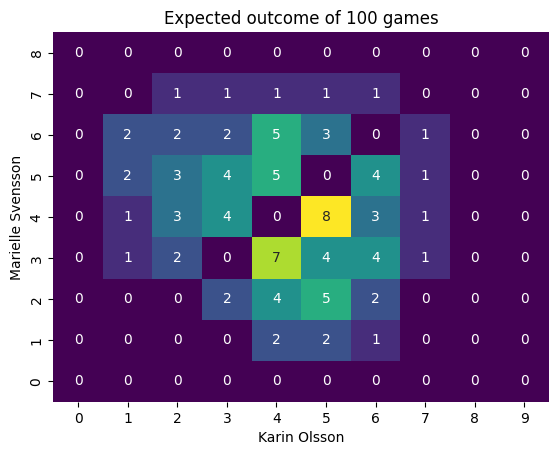

In [17]:
from mc_cup.matchplay_MC import MCResult
res = MCResult('Karin Olsson', 'Marielle Svensson', 'F6',data, list(LANES.values()),1000)
res.save_heatmap(None)
res.hash()


('6 (58)', '5 (42)')

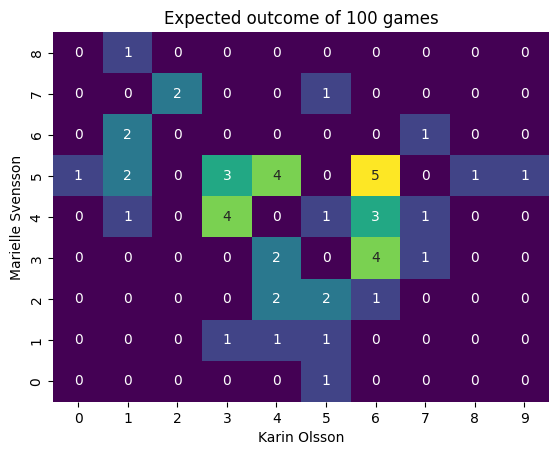

In [28]:
from collections import Counter
Counter([a[:2] for a in res.results]).most_common(20)

[((6, 5), 5),
 ((6, 3), 4),
 ((4, 5), 4),
 ((3, 4), 4),
 ((6, 4), 3),
 ((3, 5), 3),
 ((2, 7), 2),
 ((1, 5), 2),
 ((1, 6), 2),
 ((4, 2), 2),
 ((5, 2), 2),
 ((4, 3), 2),
 ((3, 1), 1),
 ((5, 0), 1),
 ((7, 3), 1),
 ((7, 6), 1),
 ((4, 1), 1),
 ((1, 4), 1),
 ((5, 1), 1),
 ((8, 5), 1)]

In [ ]:


Counter(res.results).most_common(20)

[((6, 3), 4),
 ((6, 5), 4),
 ((6, 4), 3),
 ((3, 4), 3),
 ((3, 5), 3),
 ((4, 5, 'SD'), 2),
 ((2, 7), 2),
 ((1, 5), 2),
 ((1, 6), 2),
 ((4, 2), 2),
 ((4, 5), 2),
 ((5, 2), 2),
 ((6, 5, 'SD'), 1),
 ((3, 1), 1),
 ((5, 0), 1),
 ((7, 3), 1),
 ((7, 6, 'SD'), 1),
 ((4, 1), 1),
 ((1, 4), 1),
 ((5, 1), 1)]

In [111]:
from data2 import BamseScraper,TournamentBracket
from matchplay_MC import Cup_16, Cup_32,CupResult
from bracket import RANK_W,RANK_M

In [69]:
data = BamseScraper('https://minigolf-live.com/turnier1304a/')
#define the lanes for the CUP system
lanes_f = [ 'F'+str(i) for i in [1,2,3,8,9,10,13,16,18]]
lanes_e = [ 'E'+str(i) for i in [2,3,6,10,14,15,16,17,18 ]]
LANES_A = lanes_f
LANES_B = lanes_e
lanedict_a = {f'A{i+1}':lane for i,lane in enumerate(LANES_A)}
lanedict_b = {f'B{i+1}':lane for i,lane in enumerate(LANES_B)}
lanes ={**lanedict_a,**lanedict_b} 
lanes.values()



Found 120 players.


dict_values(['F1', 'F2', 'F3', 'F8', 'F9', 'F10', 'F13', 'F16', 'F18', 'E2', 'E3', 'E6', 'E10', 'E14', 'E15', 'E16', 'E17', 'E18'])

In [107]:
from matchplay_MC import Cup, ROUNDS_16
cup = Cup(RANK_W, data, lanes, ROUNDS_16)
cup.run()


Stefanie Blendermann Mirva Juhola F2
Sandra Kungsman Carolin Svensson F3
Michaela Krane Martina Maderová F8
Anna Bandera Nadine Jürgens F9
Melanie Hammerschmidt Lucie Indráková F10
Karin Olsson Julia Sjöberg F13
Jasmin Bothmann Mia Vuorihovi F16
Lara Jehle Michaela Irxenmayer F18
Stefanie Blendermann Sandra Kungsman F1
Michaela Krane Anna Bandera F3
Melanie Hammerschmidt Karin Olsson F9
Jasmin Bothmann Lara Jehle F13
Stefanie Blendermann Anna Bandera E2
Melanie Hammerschmidt Lara Jehle E2
Stefanie Blendermann Lara Jehle E2
Anna Bandera Melanie Hammerschmidt E2


In [119]:
from data2 import TournamentBracket
tournament = TournamentBracket("cup16template.html")

tournament.set_players(RANK_W)
tournament.set_bronze_match(cup.games["SF1"].loser, cup.games["SF2"].loser)
for tag, game in cup.games.items():
    g1res =  game.result()
    winner = game.winner
    tournament.set_result(tag, 1,g1res[0],f'fig/{tag}.png')
    tournament.set_result(tag, 2,g1res[1],f'fig/{tag}.png')
    tournament.set_winner(tag, winner)

tournament.save_html("cup16fill.html")



In [ ]:

tournament = TournamentBracket("cup16template.html")
tournament.set_players(RANK_W)
cup_W = Cup_16(RANK_W, data, LANES_A,LANES_B,mc_iter = 1000)

cup_W.set('G1',CupResult('Stefanie Blendermann', ' Mirva Juhola', (3,2)))
cup_W.run()

tournament.set_bronze_match(cup_W.games["S1"].loser, cup_W.games["S2"].loser)
for tag, game in cup_W.games.items():
    g1res =  game.result()
    winner = game.winner
    tournament.set_result(tag, 1,g1res[0])
    tournament.set_result(tag, 2,g1res[1])
    tournament.set_winner(tag, winner)


tournament.save_html("cup16fill.html")

Retrieving data for Stefanie Blendermann
Retrieving data for Mirva Juhola
Retrieving data for Sandra Kungsman
Retrieving data for Carolin Svensson
Retrieving data for Michaela Krane
Retrieving data for Martina Maderová
Retrieving data for Anna Bandera
Retrieving data for Nadine Jürgens
Retrieving data for Melanie Hammerschmidt
Retrieving data for Lucie Indráková
Retrieving data for Karin Olsson
Retrieving data for Julia Sjöberg
Retrieving data for Jasmin Bothmann
Retrieving data for Mia Vuorihovi
Retrieving data for Lara Jehle
Retrieving data for Michaela Irxenmayer


In [87]:
from matchplay_MC import MCResult
res = MCResult('Stefanie Blendermann', 'Mirva Juhola', lanes['A1'],data, list(lanes.values()),1000)

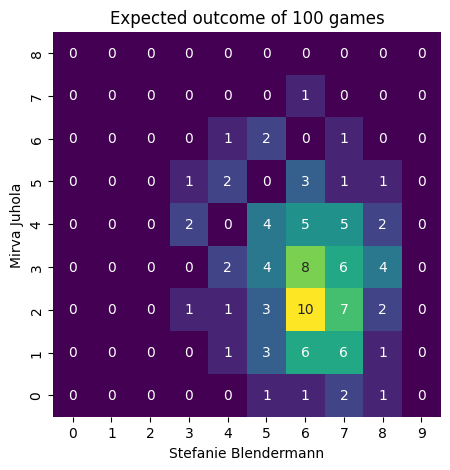

In [103]:
fig = res.heatmap()

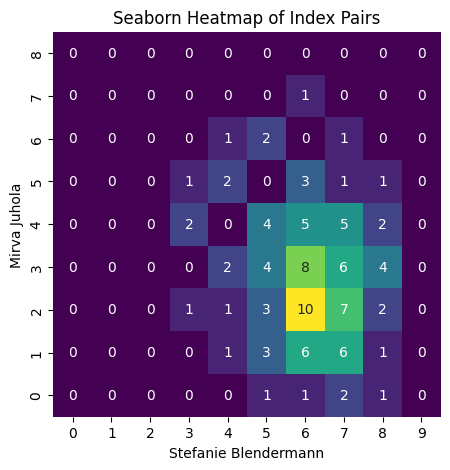

In [44]:
from data import LaneData
data = LaneData('https://minigolf-live.com/turnier1304a/result.htm')

In [49]:
from data2 import BamseScraper
data2 = BamseScraper('https://minigolf-live.com/turnier1304a/')

Found 120 players.


In [50]:
print(data['Stefanie Blendermann'])

defaultdict(<class 'list'>, {'F1': [1, 2, 3, 1, 2], 'E1': [1, 1, 1, 1, 1], 'F2': [1, 1, 3, 2, 1], 'E2': [1, 1, 1, 2, 1], 'F3': [1, 1, 1, 2, 1], 'E3': [1, 1, 1, 1, 1], 'F4': [1, 1, 2, 2, 1], 'E4': [1, 1, 1, 1, 1], 'F5': [1, 1, 1, 1, 1], 'E5': [1, 1, 1, 1, 1], 'F6': [3, 2, 3, 3, 3], 'E6': [1, 1, 1, 1, 2], 'F7': [1, 1, 1, 1, 2], 'E7': [1, 1, 1, 1, 1], 'F8': [4, 1, 2, 2, 3], 'E8': [1, 1, 1, 1, 1], 'F9': [3, 1, 1, 1, 2], 'E9': [1, 1, 1, 1, 1], 'F10': [1, 1, 2, 1, 1], 'E10': [2, 2, 1, 2, 2], 'F11': [2, 2, 2, 4, 2], 'E11': [1, 1, 1, 1, 1], 'F12': [2, 1, 1, 1, 1], 'E12': [1, 1, 1, 1, 1], 'F13': [1, 1, 1, 2, 2], 'E13': [1, 1, 1, 1, 1], 'F14': [1, 1, 1, 1, 1], 'E14': [2, 2, 2, 1, 1], 'F15': [2, 1, 2, 2, 2], 'E15': [1, 1, 1, 1, 1], 'F16': [1, 4, 3, 2, 2], 'E16': [1, 2, 1, 1, 1], 'F17': [2, 1, 1, 1, 1], 'E17': [2, 2, 1, 1, 1], 'F18': [2, 3, 2, 2, 2], 'E18': [1, 1, 1, 1, 2]})


In [51]:
print(data2['Stefanie Blendermann'])

Retrieving data for Stefanie Blendermann
defaultdict(<class 'list'>, {'F1': [1, 2, 3, 1, 2], 'E1': [1, 1, 1, 1, 1], 'F2': [1, 1, 3, 2, 1], 'E2': [1, 1, 1, 2, 1], 'F3': [1, 1, 1, 2, 1], 'E3': [1, 1, 1, 1, 1], 'F4': [1, 1, 2, 2, 1], 'E4': [1, 1, 1, 1, 1], 'F5': [1, 1, 1, 1, 1], 'E5': [1, 1, 1, 1, 1], 'F6': [3, 2, 3, 3, 3], 'E6': [1, 1, 1, 1, 2], 'F7': [1, 1, 1, 1, 2], 'E7': [1, 1, 1, 1, 1], 'F8': [4, 1, 2, 2, 3], 'E8': [1, 1, 1, 1, 1], 'F9': [3, 1, 1, 1, 2], 'E9': [1, 1, 1, 1, 1], 'F10': [1, 1, 2, 1, 1], 'E10': [2, 2, 1, 2, 2], 'F11': [2, 2, 2, 4, 2], 'E11': [1, 1, 1, 1, 1], 'F12': [2, 1, 1, 1, 1], 'E12': [1, 1, 1, 1, 1], 'F13': [1, 1, 1, 2, 2], 'E13': [1, 1, 1, 1, 1], 'F14': [1, 1, 1, 1, 1], 'E14': [2, 2, 2, 1, 1], 'F15': [2, 1, 2, 2, 2], 'E15': [1, 1, 1, 1, 1], 'F16': [1, 4, 3, 2, 2], 'E16': [1, 2, 1, 1, 1], 'F17': [2, 1, 1, 1, 1], 'E17': [2, 2, 1, 1, 1], 'F18': [2, 3, 2, 2, 2], 'E18': [1, 1, 1, 1, 2]})


In [ ]:
from matchplay_MC import Cup_16, Cup_32,CupResult
from cup_filler import TournamentBracket
from bracket import RANK_W,RANK_M
tournament = TournamentBracket("cup16template.html")
tournament.set_players(RANK_W)
cup_W = Cup_16(RANK_W, data, LANES_A,LANES_B,mc_iter = 1000)

cup_W.set('G1',CupResult('Stefanie Blendermann', ' Mirva Juhola', (3,2)))
cup_W.run()

tournament.set_bronze_match(cup_W.games["S1"].loser, cup_W.games["S2"].loser)
for tag, game in cup_W.games.items():
    g1res =  game.result()
    winner = game.winner
    tournament.set_result(tag, 1,g1res[0])
    tournament.set_result(tag, 2,g1res[1])
    tournament.set_winner(tag, winner)


tournament.save_html("cup16fill.html")

In [29]:
tournament = TournamentBracket("cup32template.html")
tournament.set_players(RANK_M)
cup_M = Cup_32(RANK_M, data, LANES_A,LANES_B,mc_iter = 1000)

cup_M.set('G1',CupResult('Yannick Müller', 'Mathias Jagschitz', (5,0)))

cup_M.run()

tournament.set_bronze_match(cup_M.games["SF1"].loser, cup_M.games["SF2"].loser)
for tag, game in cup_M.games.items():
    g1res =  game.result()
    winner = game.winner
    tournament.set_result(tag, 1,g1res[0])
    tournament.set_result(tag, 2,g1res[1])
    tournament.set_winner(tag, winner)


tournament.save_html("cup32fill.html")

In [13]:
from bracket import RANK_W,RANK_M

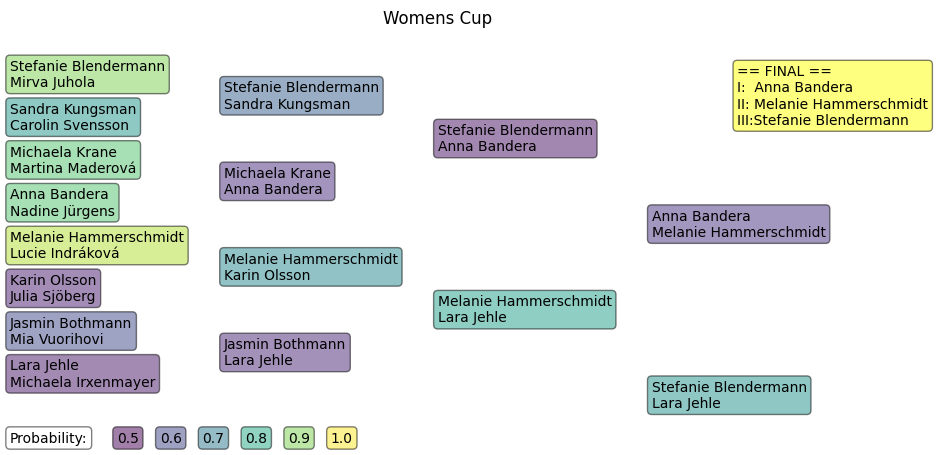

In [46]:
from matchplay_MC import Cup_16, Cup_32
cup_W = Cup_16(RANK_W, data, LANES_A,LANES_B,mc_iter = 100)
cup_W.plot()
# plt.savefig('../FIG/matchplay_W_final',bbox_inches = 'tight')
plt.show()

In [45]:
example = cup_W.game('Stefanie Blendermann','Lara Jehle',LANES_A[0])
print(example)


Game(Stefanie Blendermann, Lara Jehle)
Mode res: (6, 3)
Percentages: (68, 32)


((6, 3), 78)

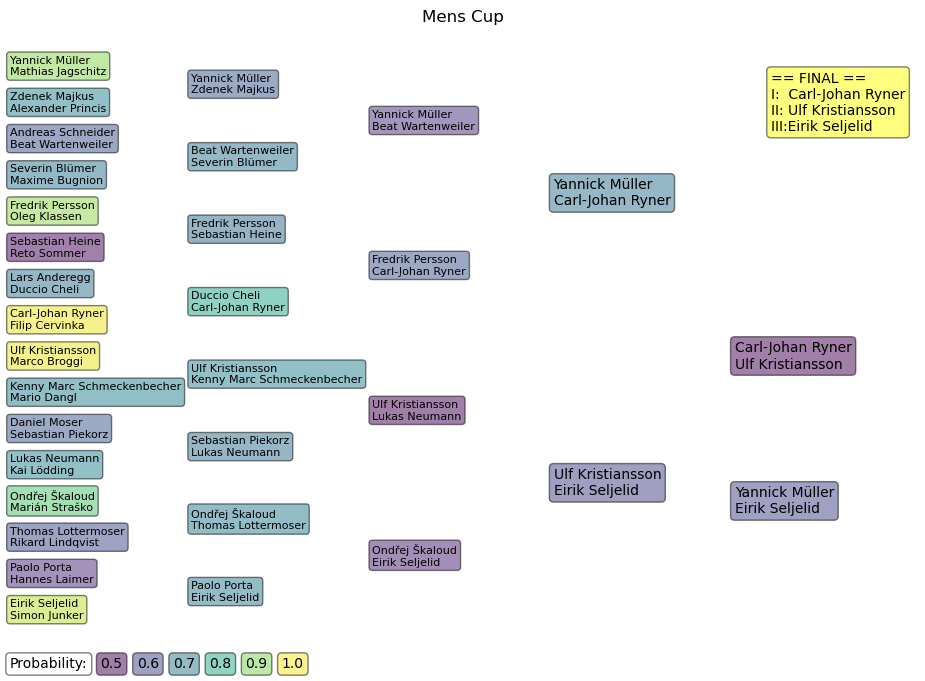

In [20]:
cup_M = Cup_32(RANK_M, data, LANES_A,LANES_B,mc_iter = 10000)
cup_M.plot()
plt.savefig('../FIG/matchplay_M_final',bbox_inches = 'tight')

In [14]:
from matchplay import gen_Cup_16, gen_Cup_32
n_MC = 50000
medals_w = [x.medals for x in gen_Cup_16(RANK_W, data, LANES_A,LANES_B,n_MC) ]
medals_m = [x.medals for x in gen_Cup_32(RANK_M, data, LANES_A,LANES_B,n_MC) ]

  0%|          | 0/50000 [00:00<?, ?it/s]

  0%|          | 0/50000 [00:00<?, ?it/s]

In [15]:
Counter(medals_m).most_common(3)

[(('Carl-Johan Ryner', 'Ulf Kristiansson', 'Eirik Seljelid'), 874),
 (('Ulf Kristiansson', 'Carl-Johan Ryner', 'Eirik Seljelid'), 787),
 (('Carl-Johan Ryner', 'Ulf Kristiansson', 'Ondřej Škaloud'), 759)]

In [25]:
Counter(medals_w).most_common(5)

[(('Anna Bandera', 'Melanie Hammerschmidt', 'Stefanie Blendermann'), 2040),
 (('Melanie Hammerschmidt', 'Anna Bandera', 'Stefanie Blendermann'), 1733),
 (('Melanie Hammerschmidt', 'Stefanie Blendermann', 'Anna Bandera'), 1562),
 (('Melanie Hammerschmidt', 'Stefanie Blendermann', 'Michaela Krane'), 1394),
 (('Melanie Hammerschmidt', 'Michaela Krane', 'Stefanie Blendermann'), 1272)]

In [16]:
from utils import medalists
medalists(medals_w)

,Player,Gold,Silver,Bronze
8,Melanie Hammerschmidt,32,25,10
2,Anna Bandera,20,12,14
0,Stefanie Blendermann,17,14,20
7,Michaela Krane,9,10,12
9,Sandra Kungsman,6,8,10
4,Jasmin Bothmann,4,7,9
6,Karin Olsson,4,7,3
3,Lara Jehle,3,7,8
1,Michaela Irxenmayer,2,4,5
10,Julia Sjöberg,1,3,1


In [17]:
medalists(medals_m)

,Player,Gold,Silver,Bronze
12,Carl-Johan Ryner,24,17,9
10,Ulf Kristiansson,19,12,12
6,Eirik Seljelid,11,10,13
7,Fredrik Persson,10,9,5
5,Ondřej Škaloud,9,8,11
4,Lukas Neumann,9,8,8
1,Yannick Müller,7,9,12
2,Beat Wartenweiler,3,5,6
11,Zdenek Majkus,1,3,4
3,Kenny Marc Schmeckenbecher,1,2,2


In [18]:
print(medalists(medals_w).to_markdown(index=False))

| Player                |   Gold |   Silver |   Bronze |
|:----------------------|-------:|---------:|---------:|
| Melanie Hammerschmidt |     32 |       25 |       10 |
| Anna Bandera          |     20 |       12 |       14 |
| Stefanie Blendermann  |     17 |       14 |       20 |
| Michaela Krane        |      9 |       10 |       12 |
| Sandra Kungsman       |      6 |        8 |       10 |
| Jasmin Bothmann       |      4 |        7 |        9 |
| Karin Olsson          |      4 |        7 |        3 |
| Lara Jehle            |      3 |        7 |        8 |
| Michaela Irxenmayer   |      2 |        4 |        5 |
| Julia Sjöberg         |      1 |        3 |        1 |
| Carolin Svensson      |      1 |        1 |        2 |


In [19]:
print(medalists(medals_m).to_markdown(index=False))

| Player                     |   Gold |   Silver |   Bronze |
|:---------------------------|-------:|---------:|---------:|
| Carl-Johan Ryner           |     24 |       17 |        9 |
| Ulf Kristiansson           |     19 |       12 |       12 |
| Eirik Seljelid             |     11 |       10 |       13 |
| Fredrik Persson            |     10 |        9 |        5 |
| Ondřej Škaloud             |      9 |        8 |       11 |
| Lukas Neumann              |      9 |        8 |        8 |
| Yannick Müller             |      7 |        9 |       12 |
| Beat Wartenweiler          |      3 |        5 |        6 |
| Zdenek Majkus              |      1 |        3 |        4 |
| Kenny Marc Schmeckenbecher |      1 |        2 |        2 |
| Sebastian Piekorz          |      1 |        2 |        2 |
| Paolo Porta                |      1 |        2 |        2 |
| Sebastian Heine            |      1 |        2 |        1 |


In [128]:
# check all lanes
medals_m_all = [x.medals for x in gen_Cup_32(RANK_M, data, LANES_A_ALL,LANES_B_ALL,n_MC) ]

In [130]:
print(medalists(medals_m_all).to_markdown(index=False))

| Player             |   Gold |   Silver |   Bronze |
|:-------------------|-------:|---------:|---------:|
| Ulf Kristiansson   |     23 |       18 |       13 |
| Yannick Müller     |     23 |       16 |       20 |
| Carl-Johan Ryner   |     20 |       14 |       14 |
| Ondřej Škaloud     |     10 |       11 |       11 |
| Eirik Seljelid     |      8 |       10 |        9 |
| Fredrik Persson    |      7 |        8 |        8 |
| Lukas Neumann      |      2 |        5 |        4 |
| Andreas Schneider  |      2 |        3 |        4 |
| Thomas Lottermoser |      1 |        2 |        2 |
| Sebastian Heine    |      1 |        2 |        3 |


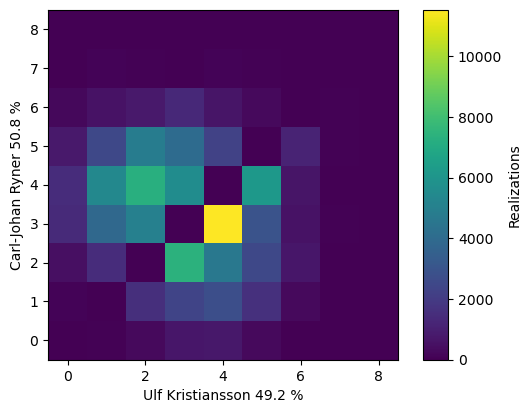

In [137]:
from utils import plotGame
plotGame('Carl-Johan Ryner','Ulf Kristiansson',LANES_B[0],data,LANES_A+LANES_B,100000)

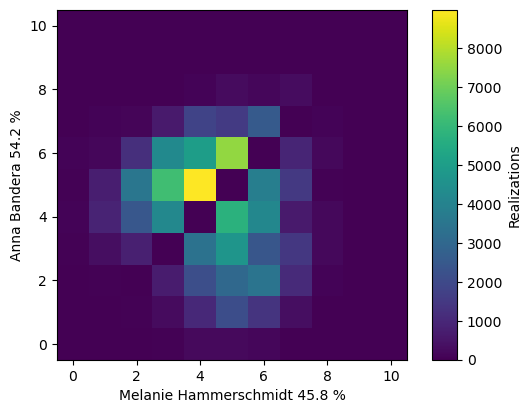

In [23]:
from utils import plotGame
plotGame('Anna Bandera','Melanie Hammerschmidt',LANES_B[0],data,LANES_A+LANES_B,100000)

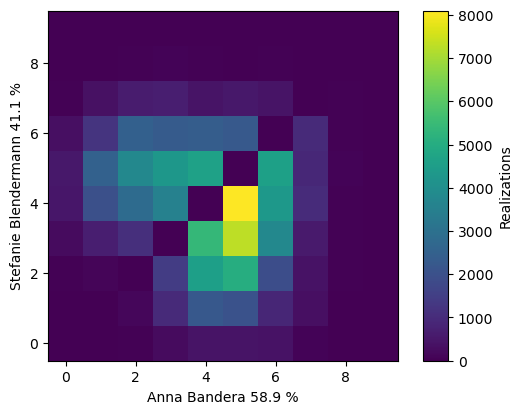

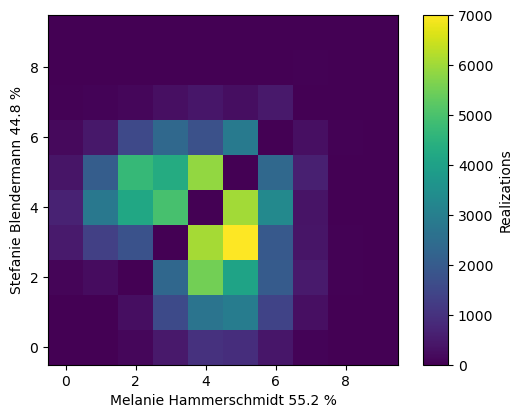

In [27]:
from utils import plotGame
plotGame('Stefanie Blendermann','Anna Bandera',LANES_B[0],data,LANES_A+LANES_B,100000)
plotGame('Stefanie Blendermann','Melanie Hammerschmidt',LANES_B[0],data,LANES_A+LANES_B,100000)